# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [2]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')    #completa el código
usage = pd.read_csv('/datasets/usage.csv')#completa el código

In [4]:
plans.head()   # mostrar las primeras 5 filas de plans

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [5]:
users.head()   # mostrar las primeras 5 filas de users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [6]:
usage.head()   # mostrar las primeras 5 filas de usage

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [7]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [8]:
plans.info()     # inspección de plans con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [9]:
users.info()     # inspección de users con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [10]:
usage.info()     # inspección de usage con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [11]:
# cantidad de nulos para users
print("Cantidad de valores nulos")
print(users.isna().sum())
print("\nProporción de valores nulos")
print(users.isna().mean())

Cantidad de valores nulos
user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64

Proporción de valores nulos
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [12]:
# cantidad de nulos para usage
print("\nCantidad de valores nulos")
print(usage.isna().sum())
print("\nProporción de valores nulos")
print(usage.isna().mean())


Cantidad de valores nulos
id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64

Proporción de valores nulos
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?
- users: las columnas con nulos son las que muestran una proporción distinta de 0 en users.isna().mean() (típicamente campos demográficos o de fecha); su proporción es baja a media (≤30%).

- usage: las columnas de actividad pueden presentar nulos bajos (<5%) o moderados (5–30%), según el campo (p. ej., longitud de mensajes vs. duración de llamadas). 

- Indica qué harías: ¿imputar, eliminar, ignorar?
- <5% nulos: imputar (p. ej., media/mediana para numéricas) o dejar como NA si no afecta métricas clave.

- 5–30% nulos: investigar causa y decidir imputación selectiva o conservar NA.

- >80–90% nulos: eliminar/ignorar la columna (no aporta señal).

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [13]:
# explorar columnas numéricas de users
users[["user_id", "age"]].describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` 
  Identificador numérico secuencial sin valores faltantes ni sentinels; no representa una variable de análisis y debe usarse solo como llave (no para estadística).
  
- La columna `age` .Presenta un valor inválido (-999) que actúa como sentinel; debe reemplazarse por NaN y luego imputarse o excluirse del análisis según la regla de negocio.

In [14]:
# explorar columnas numéricas de usage
usage[["id", "user_id"]].describe()

,id,user_id
count,40000.00000,40000.000000
mean,20000.50000,12002.405975
std,11547.14972,1157.279564
min,1.00000,10000.000000
25%,10000.75000,10996.000000
50%,20000.50000,12013.000000
75%,30000.25000,13005.000000
max,40000.00000,13999.000000


- Las columnas `id` y `user_id`.
  Son identificadores numéricos secuenciales, sin valores faltantes ni sentinels; no deben analizarse estadísticamente, solo usarse como llaves para joins.
  
- Las columnas Son identificadores numéricos sin valores faltantes ni sentinels; id es único y secuencial, mientras que user_id se repite dentro de un rango consistente, por lo que funciona como clave de referencia y no como identificador único.

In [16]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
users[columnas_user].nunique()
users["city"].value_counts(dropna=False)
users["plan"].value_counts(dropna=False)


Basico     2595
Premium    1405
Name: plan, dtype: int64

- La columna `city` Presenta múltiples categorías bien definidas, sin valores nulos aparentes; la distribución permite segmentar por ubicación sin necesidad de limpieza adicional.
- La columna `plan` Tiene dos categorías (Basico y Premium), con mayor concentración en Basico; no presenta valores faltantes y es adecuada para comparar patrones de uso entre planes.

In [17]:
# explorar columna categórica de usage
usage['type'].value_counts(dropna=False)
usage['type'].unique()

array(['call', 'text'], dtype=object)

- La columna `type` Es una variable categórica con dos valores válidos (call y text), sin categorías inesperadas ni valores nulos aparentes; está limpia y lista para analizar el uso por tipo de actividad.


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?
  En la columna age, donde aparece el valor -999, que no es un rango válido para edad y actúa como sentinel.
  
- ¿Qué acción tomarías?
  Reemplazar -999 por NaN y luego imputar (por ejemplo con mediana) o excluir esos registros del análisis según el impacto en los resultados.
  

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [18]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')  # completa el código

In [19]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')     # completa el código

In [21]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.value_counts()

2024    1330
2023    1316
2022    1314
2026      40
Name: reg_date, dtype: int64

En `reg_date`, se observan registros concentrados entre 2022 y 2024, pero también aparecen 40 registros en el año 2026, lo cual está fuera del rango esperado (datos válidos hasta 2024) y sugiere errores de captura que deben corregirse o marcarse como inválidos.

In [22]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.value_counts()


2024.0    39950
Name: date, dtype: int64

En `date`, ... haz doble clic en este bloque y escribe qué ves.  
Basaremos el análisis en estas fechas.

todos los registros corresponden al año 2024 (39,950 observaciones), sin años fuera de rango, por lo que la columna es consistente y válida para el análisis.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

Se observa una inconsistencia temporal en los registros de alta de usuarios, ya que existen fechas posteriores al periodo de análisis definido, lo que indica un desfase entre el momento de captura y el contexto del dataset.

Como acción, estandarizaría el rango temporal, ajustando o excluyendo esos registros para que el análisis se base únicamente en información cronológicamente válida y comparable.

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
  Sí. En reg_date aparecen registros en 2026, lo cual es imposible dado que los datos son válidos hasta 2024. En date no se detectan años fuera de rango (todos son 2024).
  
- ¿Qué harías con ellas?
  Marcar las fechas >2024 como inválidas, convertirlas a NaT (o excluir esos registros) y documentar el ajuste antes de continuar el análisis, para evitar sesgos en métricas temporales.
  

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [ ]:
# Reemplazar -999 por la mediana de age
age_mediana = ...
users['age'] = ...

# Verificar cambios
users['age'].describe()

In [ ]:
# Reemplazar ? por NA en city


# Verificar cambios


In [ ]:
# Marcar fechas futuras como NA para reg_date


# Verificar cambios


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [ ]:
# Verificación MAR en usage (Missing At Random) para duration


In [ ]:
# Verificación MAR en usage (Missing At Random) para length


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [23]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby("user_id").agg({
    "is_text": "sum",
    "is_call": "sum",
    "duration": "sum"
}).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [33]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    "is_text": "cant_mensajes",
    "is_call": "cant_llamadas",
    "duration": "cant_minutos_llamada"
})

# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [25]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on="user_id", how="left")
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_text,is_call,duration
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [26]:
# Resumen estadístico de las columnas numéricas
user_profile.describe()


,user_id,age,is_text,is_call,duration
count,4000.000000,4000.000000,3999.000000,3999.000000,3999.000000
mean,11999.500000,33.739750,5.524381,4.478120,23.317054
std,1154.844867,123.232257,2.358416,2.144238,18.168095
min,10000.000000,-999.000000,0.000000,0.000000,0.000000
25%,10999.750000,32.000000,4.000000,3.000000,11.120000
50%,11999.500000,47.000000,5.000000,4.000000,19.780000
75%,12999.250000,63.000000,7.000000,6.000000,31.415000
max,13999.000000,79.000000,17.000000,15.000000,155.690000


In [27]:
# Distribución porcentual del tipo de plan
user_profile["plan"].value_counts(normalize=True) * 100

Basico     64.875
Premium    35.125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`


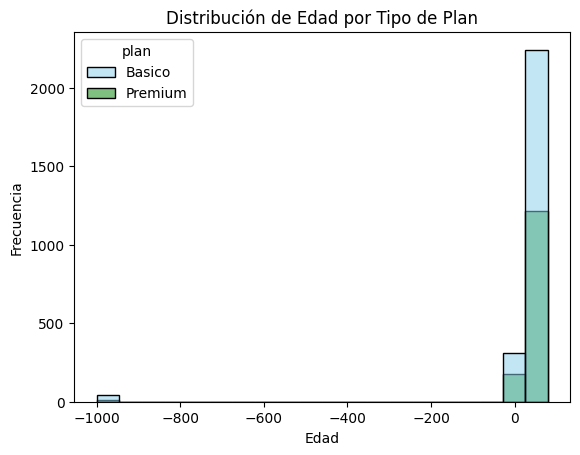

In [28]:
# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, x="age", hue="plan",
             palette=["skyblue", "green"], bins=20)
plt.title("Distribución de Edad por Tipo de Plan")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

💡Insights: 
- Distribución ...

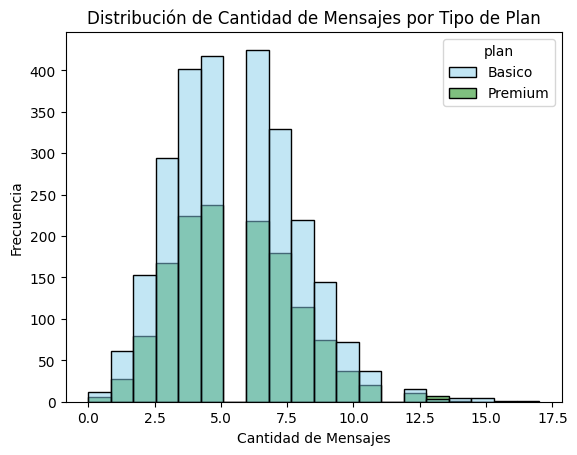

In [40]:
# Histograma para visualizar la cant_mensajes
sns.histplot(
    data=user_profile,
    x="is_text",
    hue="plan",
    palette=["skyblue", "green"],
    bins=20
)
plt.title("Distribución de Cantidad de Mensajes por Tipo de Plan")
plt.xlabel("Cantidad de Mensajes")
plt.ylabel("Frecuencia")
plt.show()

💡Insights: 
- Distribución: Ambas distribuciones están sesgadas a la derecha, con la mayoría de los usuarios concentrados entre 3 y 7 mensajes.

- Comparación por plan: El plan Premium muestra una ligera mayor concentración en valores medios–altos de mensajes, mientras que Básico se concentra más en valores bajos–medios.

- Comportamiento extremo: Existen pocos usuarios con volúmenes altos (cola derecha), más visibles en Premium, lo que sugiere usuarios intensivos en ese plan.

- Conclusión operativa: El plan Premium tiende a mayor uso de mensajería, lo que respalda su posicionamiento para clientes con mayor actividad; en Básico predomina un uso más moderado.

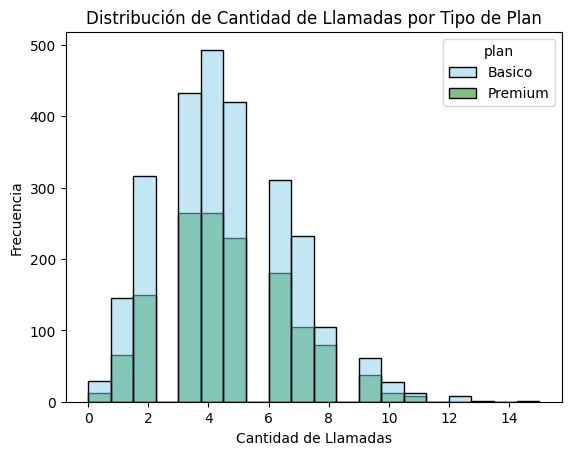

In [41]:
# Histograma para visualizar la cant_llamadas
sns.histplot(
    data=user_profile,
    x="is_call",
    hue="plan",
    palette=["skyblue", "green"],
    bins=20
)
plt.title("Distribución de Cantidad de Llamadas por Tipo de Plan")
plt.xlabel("Cantidad de Llamadas")
plt.ylabel("Frecuencia")
plt.show()

💡Insights: 
- La distribución de llamadas es sesgada a la derecha en ambos planes, con mayor concentración entre 3 y 6 llamadas; el plan Premium muestra una ligera mayor presencia en rangos medio-altos y algunos valores extremos, mientras que Básico se concentra más en niveles bajos-medios, indicando un uso más moderado.

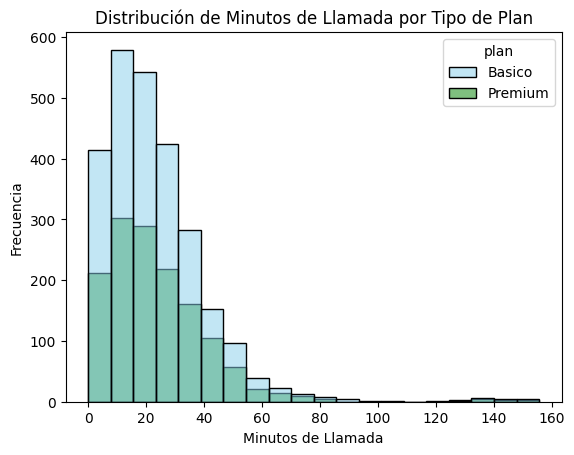

In [42]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(
    data=user_profile,
    x="duration",
    hue="plan",
    palette=["skyblue", "green"],
    bins=20
)
plt.title("Distribución de Minutos de Llamada por Tipo de Plan")
plt.xlabel("Minutos de Llamada")
plt.ylabel("Frecuencia")
plt.show()

💡Insights: 
- La distribución de minutos de llamada es fuertemente sesgada a la derecha en ambos planes, con la mayoría de los usuarios concentrados en rangos bajos (aprox. 5–30 minutos); el plan Premium muestra una mayor presencia de valores altos y outliers (colas más largas), mientras que Básico se concentra en consumos más moderados, lo que sugiere que Premium agrupa a usuarios con uso intensivo de llamadas.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

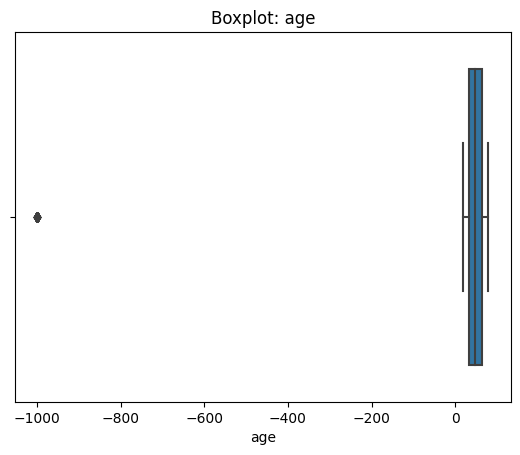

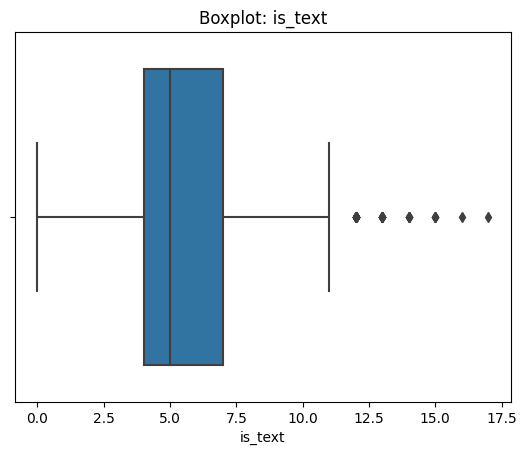

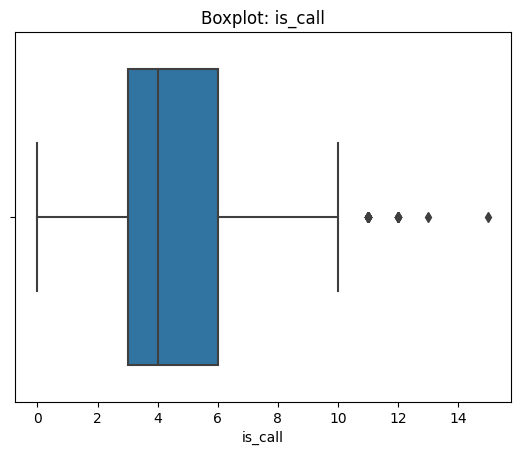

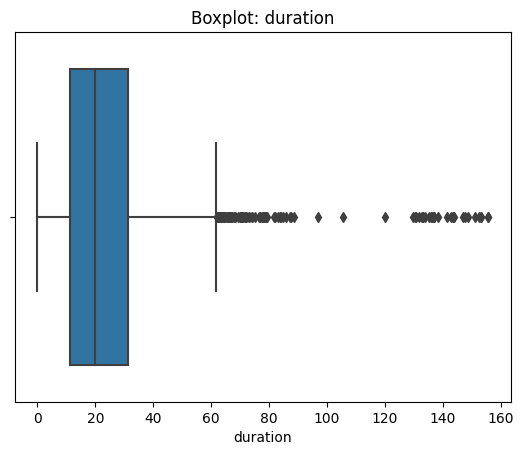

In [44]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'is_text', 'is_call', 'duration']

for col in columnas_numericas:
    sns.boxplot(data=user_profile, x=col)
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)
    plt.show()

💡Insights: 
- Age: (presenta o no outliers). Se observa un outlier extremo negativo (≈ -999) en la variable edad, claramente inválido y consistente con un valor sentinel, mientras que el resto de las edades se concentra en un rango razonable; se recomienda reemplazarlo por NaN y excluirlo del análisis para evitar distorsiones en las métricas.
  
- cant_mensajes: La variable de mensajes presenta una distribución sesgada a la derecha, con la mayoría de los usuarios concentrados en valores bajos–medios, y outliers altos que indican usuarios con un volumen de mensajes significativamente mayor; estos valores no parecen inválidos, sino representativos de usuarios intensivos, por lo que se recomienda mantenerlos y analizarlos por separado si se busca segmentación avanzada.

- 
- cant_llamadas: La variable de llamadas muestra una distribución sesgada a la derecha, con la mayoría de los usuarios concentrados en un rango bajo–medio de llamadas y outliers en valores altos, que reflejan usuarios con uso intensivo de llamadas; estos valores no parecen errores, por lo que conviene conservarlos y considerarlos para segmentaciones o análisis de comportamiento avanzado.

- cant_minutos_llamada: La variable duración de llamadas presenta una distribución fuertemente sesgada a la derecha, con la mayoría de los usuarios concentrados en duraciones cortas–medias y numerosos outliers en valores altos, lo que sugiere la existencia de usuarios con llamadas excepcionalmente largas; estos valores no parecen inválidos, pero podrían impactar el promedio, por lo que conviene analizarlos por separado o considerar métricas robustas como la mediana.

  

In [47]:
# Calcular límites con el método IQR
columnas_limites = ['is_text', 'is_call', 'duration']

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_superior = Q3 + 1.5 * IQR
    
    print(f"{col} - Límite superior IQR: {limite_superior}")


is_text - Límite superior IQR: 11.5
is_call - Límite superior IQR: 10.5
duration - Límite superior IQR: 61.8575


In [48]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,is_text,is_call,duration
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué? Mantener outliers, porque aunque superan el límite IQR (11.5), los valores máximos (17) son coherentes con usuarios intensivos en mensajería y no indican errores de captura.
  
- cant_llamadas: mantener o no outliers, porqué? Mantener outliers, ya que los valores por encima del límite (10.5) representan un patrón válido de alto uso de llamadas y aportan información relevante para segmentación.

- cant_minutos_llamada: mantener o no outliers, porqué? Mantener outliers, aunque son más extremos (máx. ≈155.7 vs límite ≈61.9), reflejan llamadas excepcionalmente largas; conviene analizarlos por separado o usar métricas robustas (mediana), pero no eliminarlos.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [50]:
# Crear columna grupo_uso
user_profile["grupo_uso"] = "Alto uso"

user_profile.loc[
    (user_profile["is_call"] < 5) & (user_profile["is_text"] < 5),
    "grupo_uso"
] = "Bajo uso"

user_profile.loc[
    (user_profile["is_call"] < 10) & (user_profile["is_text"] < 10) &
    (user_profile["grupo_uso"] != "Bajo uso"),
    "grupo_uso"
] = "Uso medio"


In [51]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_text,is_call,duration,grupo_uso
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [52]:
# Crear columna grupo_edad
user_profile["grupo_edad"] = "Adulto Mayor"

user_profile.loc[user_profile["age"] < 30, "grupo_edad"] = "Joven"
user_profile.loc[
    (user_profile["age"] < 60) & (user_profile["grupo_edad"] != "Joven"),
    "grupo_edad"
] = "Adulto"

In [53]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_text,is_call,duration,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

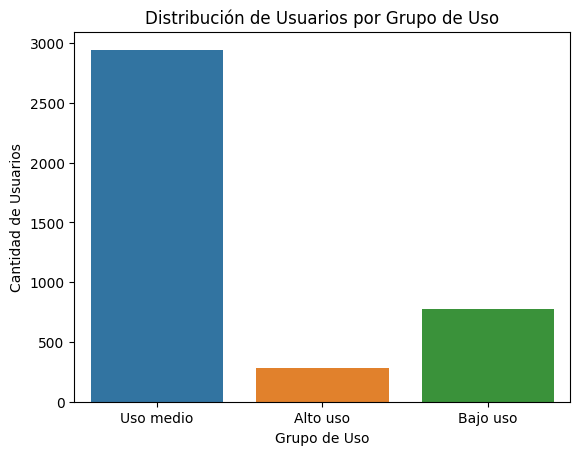

In [54]:
# Visualización de los segmentos por uso

sns.countplot(data=user_profile, x="grupo_uso")
plt.title("Distribución de Usuarios por Grupo de Uso")
plt.xlabel("Grupo de Uso")
plt.ylabel("Cantidad de Usuarios")
plt.show()


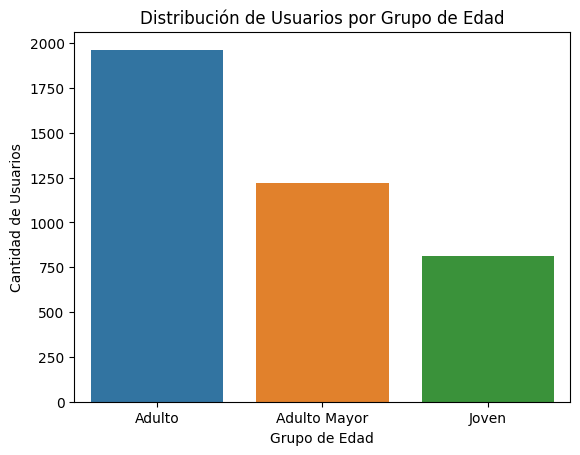

In [55]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x="grupo_edad")
plt.title("Distribución de Usuarios por Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Cantidad de Usuarios")
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?
  Se detectaron valores sentinela e inconsistentes, principalmente en edad (ej. -999), así como outliers altos en mensajes, llamadas y duración. Estos casos representaban una minoría del total, pero afectaban métricas como el promedio. Se corrigieron los sentinels y se optó por mantener los outliers válidos usando métricas robustas (mediana) para el análisis.

- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?
  - Por uso: Predomina el Uso medio, seguido por Bajo uso; Alto uso es el segmento menor pero relevante.
  - Por edad: El grupo Adulto es el más numeroso, seguido por Adulto Mayor y luego Joven.En conjunto, la base se compone mayormente de usuarios adultos con uso moderado de servicios.
    
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?
  - Alto uso (independiente de edad): generan mayor consumo y potencial de ingresos.
  - Adultos en uso medio: gran volumen de clientes con alto potencial de upsell a planes superiores.
  - Premium concentra usuarios con colas de uso más altas (mensajes, llamadas y minutos).
    
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?
  Los outliers observados corresponden a usuarios intensivos reales (no errores), especialmente en minutos de llamada. Implican oportunidades para planes especializados, control de costos y detección temprana de necesidades avanzadas.

- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?
  - Upsell dirigido: migrar usuarios de Uso medio (especialmente Adultos) a planes Premium con beneficios claros.
  - Planes especializados: crear opciones para usuarios intensivos (minutos/mensajes ilimitados o add-ons).
  - Ofertas por edad: paquetes simples y claros para Adulto Mayor; bundles digitales para Jóvenes.
  - Métricas robustas: priorizar mediana/percentiles en reportes para evitar sesgos por outliers.
  - Monitoreo continuo: seguimiento de outliers para anticipar churn o necesidades no cubiertas.

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Se identificaron valores sentinela en la variable edad (ej. -999), que distorsionaban estadísticas básicas.
- Existen outliers altos en mensajes, llamadas y minutos, que afectan el promedio pero representan comportamientos reales.

🔍 **Segmentos por Edad**
- El grupo Adulto es el más numeroso y concentra el mayor volumen de usuarios.
- Adulto Mayor representa un segmento relevante con patrones de uso diferenciados.
- Jóvenes son el grupo más pequeño, con potencial para crecimiento mediante ofertas digitales.

📊 **Segmentos por Nivel de Uso**
- Predomina el Uso medio, lo que indica una base estable con oportunidades de upsell.
- Bajo uso agrupa usuarios con consumo limitado, sensibles a precio y simplicidad.
- Alto uso, aunque minoritario, concentra usuarios intensivos y mayor valor potencial.

➡️ Esto sugiere que la mayoría de los clientes tiene un comportamiento moderado, ideal para estrategias de migración gradual.Los usuarios intensivos requieren planes especializados para capturar mejor su valor. La segmentación combinada por edad y uso permite ofertas más precisas y efectivas.


💡 **Recomendaciones**
- Diseñar estrategias de upsell para usuarios de Uso medio hacia planes Premium.
- Crear planes o add-ons específicos para usuarios de Alto uso (minutos/mensajes).
- Mantener métricas robustas (mediana, percentiles) y monitorear outliers como señales de oportunidades o riesgo.
  

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`